In [21]:
from numpy import *
from scipy.integrate import odeint
from matplotlib.pyplot import plot, xlabel, ylabel

# parameters
r = 0.5
K = 0.5
D = 0.05

# the size of the spatial domain
# his is actual size, such as "kilometres"
L = 100.
# the number of points in the grid
grid_size = 100
# the integration times
t = arange(0, 300, 0.1)
# the grid
dx = L / (grid_size+1)
grid = arange(0, L, dx)[1:-1]

# the initial condition, consisting of a small "square" in the middle
y0 = zeros_like(grid)
y0[grid_size//2 - 2:grid_size//2 + 2] = 0.1

# let's define the flux
def fkpp(y, t, r, K, D, dx):
    # we calculate the spatial second derivative
    d2x = -2 * y
    d2x[1:-1] += y[2:] + y[:-2]
    d2x[0] += y[1]
    d2x[-1] += y[-2]
    d2x = d2x/dx/dx
    # then add the reaction terms
    dy = r * y * (1. - y/K) + D * d2x
    return dy

y = odeint(fkpp, y0, t, (r, K, D, dx))

Text(0, 0.5, 'population density')

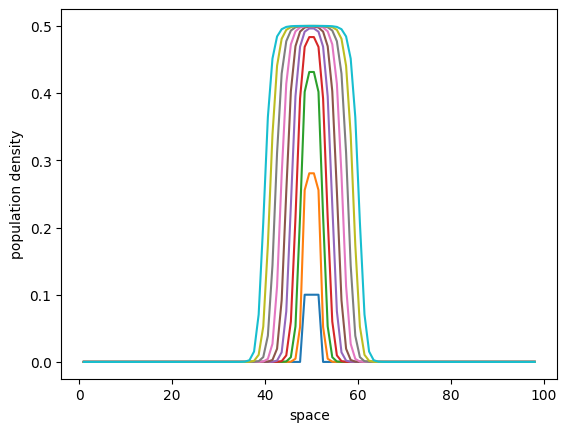

In [22]:
# let us plot the solution

for i in linspace(t[0], t[-1], 10):
    plot(grid, y[int(i),:])
xlabel('space')
ylabel('population density')

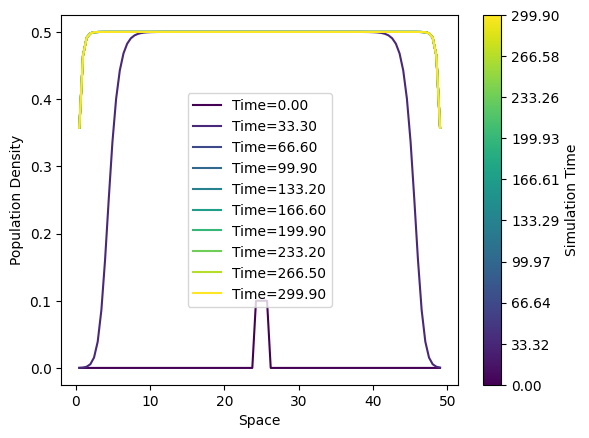

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Assuming t is your array of time steps, and it's evenly spaced
num_plots = 10  # Number of plots you want to include
colors = cm.viridis(np.linspace(0, 1, num_plots))  # Change 'viridis' to any other colormap as per your liking

# Create a figure and a subplot
fig, ax = plt.subplots()

# Assuming grid is your spatial domain and y is the result matrix
for i, color in zip(np.linspace(0, len(t)-1, num_plots, dtype=int), colors):
    ax.plot(grid, y[i, :], color=color, label=f'Time={t[i]:.2f}')

ax.set_xlabel('Space')
ax.set_ylabel('Population Density')
# Create a colorbar
sm = plt.cm.ScalarMappable(cmap=cm.viridis, norm=plt.Normalize(vmin=t[0], vmax=t[-1]))
sm._A = []  # Dummy array for the scalar mappable. matplotlib requirement.
cbar = plt.colorbar(sm, ticks=np.linspace(t[0], t[-1], num_plots))
cbar.ax.set_yticklabels([f'{time:.2f}' for time in np.linspace(t[0], t[-1], num_plots)])  # Set text labels on the colorbar
cbar.set_label('Simulation Time')

plt.legend(loc='best')
plt.show()
